<a href="https://colab.research.google.com/github/shraavb/Ecolizer/blob/main/Fertilizer_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fertilizer-recommendation:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3389527%2F5901272%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240316%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240316T132536Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D07e6e725e4562e608f1d09efa9237c53585701b52f8103c0af2603d2bcec8acd794b4efdefdc03288556bec09e98bb588f72a6b9e296f0f4f1dc27b3465463f86e3e12cd8ce54e1a27bdcf93fe2adfe347236faab87adfb890e7fe3f1f18f733d02e5a186164d730dd44ed61c49d28cd1ede311a793e3bd3be842c3be4bd603bb0ed4d635f02446b0755226fa5f0f0ec780859ef09bbc357086c41090511a36b997a7be4eaac76d7b403f2bbb7bb86346a19849959da05b3495d55240ae16d0ec443ab627a76d35f2f32105e46ba7d6b7743ec32942b767d57375df7f7cf01ebe7899d9e60b75ef8d35746b0c02fb3b566a839b3daa04a78eacb57fb1a8ad9a8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 1310 bytes downloaded
Downloaded and uncompressed: fertilizer-recommendation
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fertilizer-recommendation/Fertilizer Recommendation.csv


# **Loading the data**

In [3]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = '/kaggle/input/fertilizer-recommendation/Fertilizer Recommendation.csv'

In [5]:
#Load the data
df=pd.read_csv(url)
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [6]:
#To display first five records
df.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [9]:
#To display fertilizer names
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

# **Describing**

In [10]:
#describe() method returns description of the data in the DataFrame.
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [11]:
#To display number of rows and columns
df.shape

(99, 9)

In [12]:
#To display number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


# **Data Wrangling**

In [15]:
#Count the number of empty values (NaN,NAN,na) in each column
df.isna().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [16]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

# **Exploratory Data Analysis**

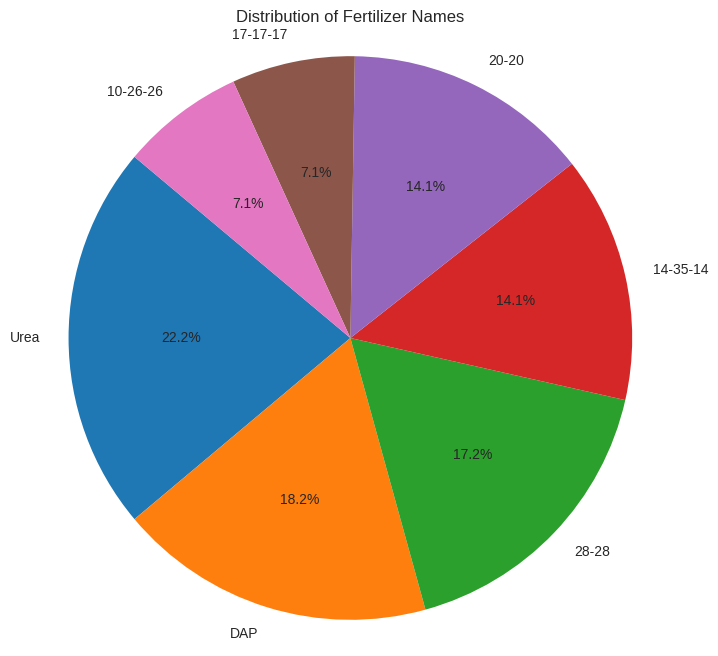

In [27]:
import matplotlib.pyplot as plt

# Get unique fertilizer names and their counts
fertilizer_counts = df['Fertilizer Name'].value_counts()

# Generate a list of unique colors
colors = plt.cm.tab10.colors[:len(fertilizer_counts)]

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(fertilizer_counts, labels=fertilizer_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Add title
plt.title('Distribution of Fertilizer Names')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()


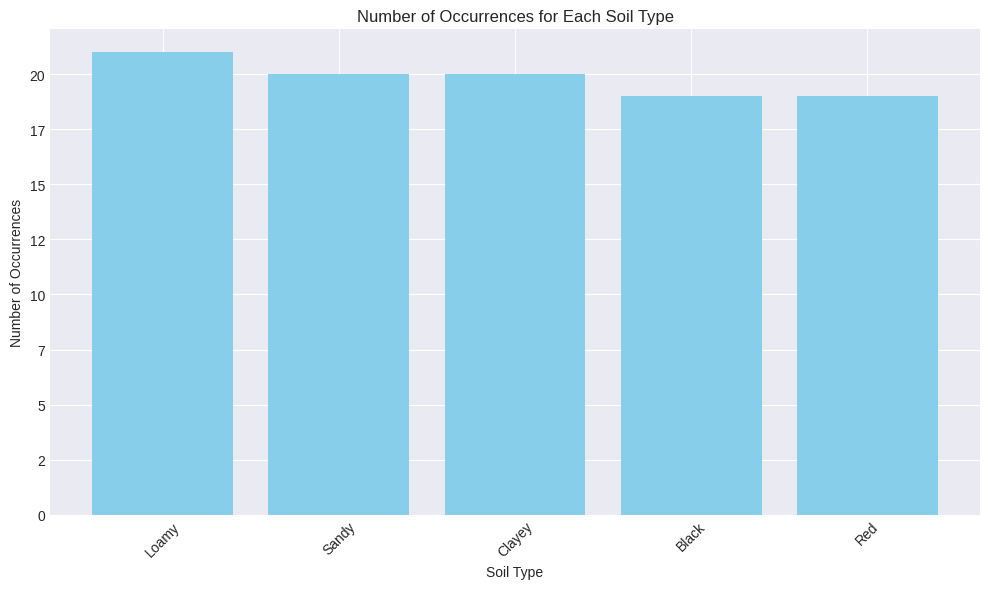

In [30]:
import matplotlib.pyplot as plt

# Get the counts of each soil type
soil_type_counts = df['Soil Type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(soil_type_counts.index, soil_type_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Soil Type')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences for Each Soil Type')

# Set y-axis ticks to integers
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


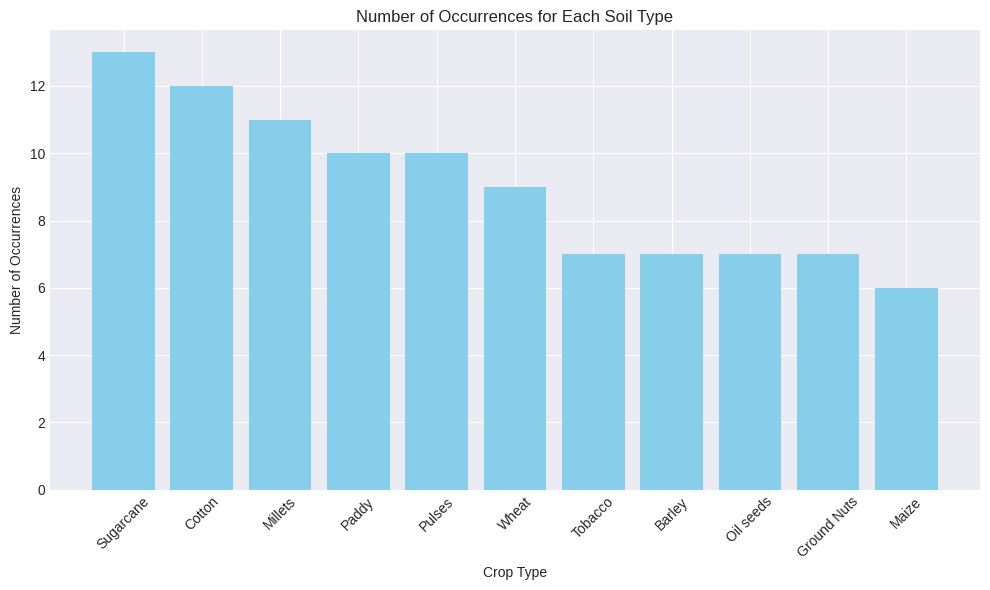

In [32]:
import matplotlib.pyplot as plt

# Get the counts of each soil type
soil_type_counts = df['Crop Type'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(soil_type_counts.index, soil_type_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Crop Type')
plt.ylabel('Number of Occurrences')
plt.title('Number of Occurrences for Each Soil Type')

# Set y-axis ticks to integers
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


<Axes: >

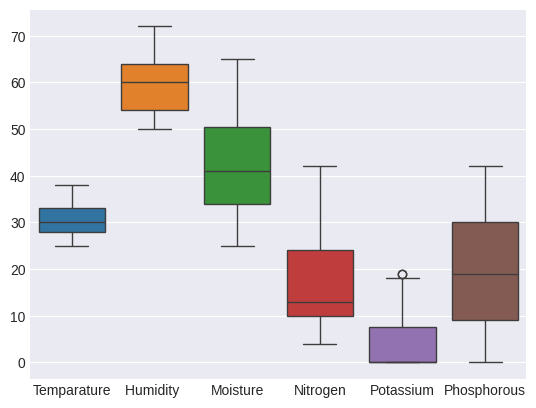

In [34]:
#Visualizing data using boxplot
sns.boxplot(data=df)
#Here we got boxplot of all the columns

**Encoding categorical data values**

In [38]:
#To display the values of column fertilizer name
df.iloc[:,8].values

array(['Urea', 'DAP', '14-35-14', '28-28', 'Urea', '17-17-17', '20-20',
       'Urea', '28-28', '14-35-14', 'DAP', '17-17-17', 'Urea', '28-28',
       'DAP', '17-17-17', 'Urea', '28-28', 'Urea', 'DAP', '20-20',
       '17-17-17', 'DAP', 'Urea', '20-20', '28-28', '14-35-14', 'Urea',
       'DAP', '20-20', '28-28', 'DAP', 'Urea', '14-35-14', '28-28',
       'Urea', '14-35-14', 'DAP', '17-17-17', 'DAP', '20-20', '14-35-14',
       '28-28', 'Urea', 'DAP', '14-35-14', '20-20', '28-28', 'Urea',
       '14-35-14', '28-28', '20-20', 'Urea', 'DAP', '17-17-17', '28-28',
       'Urea', '20-20', '17-17-17', 'DAP', 'Urea', '20-20', '28-28',
       '10-26-26', 'Urea', 'DAP', '20-20', '14-35-14', '10-26-26',
       '20-20', '28-28', 'Urea', '28-28', 'Urea', 'DAP', '14-35-14',
       '28-28', '20-20', '10-26-26', 'DAP', '14-35-14', 'Urea', 'DAP',
       '20-20', '28-28', '14-35-14', '10-26-26', 'Urea', '10-26-26',
       'DAP', '14-35-14', '10-26-26', 'Urea', '14-35-14', '28-28',
       '10-26-26', 'U

In [39]:
#Encoding Fertilizer Name using get_dummies
one_hot_encoded_data = pd.get_dummies(data, columns = ['Fertilizer Name'])
print(one_hot_encoded_data)

    10-26-26  14-35-14  17-17-17  20-20  28-28  DAP  Urea
0          0         0         0      0      0    0     1
1          0         0         0      0      0    1     0
2          0         1         0      0      0    0     0
3          0         0         0      0      1    0     0
4          0         0         0      0      0    0     1
..       ...       ...       ...    ...    ...  ...   ...
94         0         0         0      0      1    0     0
95         1         0         0      0      0    0     0
96         0         0         0      0      0    0     1
97         0         0         0      0      0    1     0
98         0         0         0      1      0    0     0

[99 rows x 7 columns]


In [40]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()
df['Fertilizer Name']=onehot_encoder.fit_transform(df[['Fertilizer Name']]).toarray()
df['Fertilizer Name'].values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.])

In [41]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()
df['Soil Type']=onehot_encoder.fit_transform(df[['Soil Type']]).toarray()
df['Soil Type'].values

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.])

In [42]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()
df['Crop Type']=onehot_encoder.fit_transform(df[['Crop Type']]).toarray()
df['Crop Type'].values

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
#Now checking data type of column fertilizer name
df['Fertilizer Name'].dtype

dtype('float64')

In [44]:
#To display first 5 rows of new data
df.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,0.0,0.0,37,0,0,0.0
1,29,52,45,0.0,0.0,12,0,36,0.0
2,34,65,62,1.0,0.0,7,9,30,0.0
3,32,62,34,0.0,0.0,22,0,20,0.0
4,28,54,46,0.0,0.0,35,0,0,0.0


In [45]:
#Finding the correlation
#corr() function tells us how one column can influence the other
data1=df.iloc[:,0:9].corr()
data1

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
Temparature,1.000000,0.973164,0.091222,-0.002751,-0.011080,-0.033771,-0.023424,0.207545,-0.045006
Humidity,0.973164,1.000000,0.091342,-0.017121,-0.007192,-0.060646,-0.003833,0.204044,-0.047881
Moisture,0.091222,0.091342,1.000000,0.065288,-0.036096,-0.095945,0.027727,0.009276,-0.095831
Soil Type,-0.002751,-0.017121,0.065288,1.000000,-0.134427,0.130520,-0.116573,-0.165494,-0.134427
Crop Type,-0.011080,-0.007192,-0.036096,-0.134427,1.000000,-0.151475,0.090681,0.152105,0.077640
Nitrogen,-0.033771,-0.060646,-0.095945,0.130520,-0.151475,1.000000,-0.500087,-0.686971,-0.270980
Potassium,-0.023424,-0.003833,0.027727,-0.116573,0.090681,-0.500087,1.000000,0.089192,0.683274
Phosphorous,0.207545,0.204044,0.009276,-0.165494,0.152105,-0.686971,0.089192,1.000000,-0.018345
Fertilizer Name,-0.045006,-0.047881,-0.095831,-0.134427,0.077640,-0.270980,0.683274,-0.018345,1.000000


<Axes: >

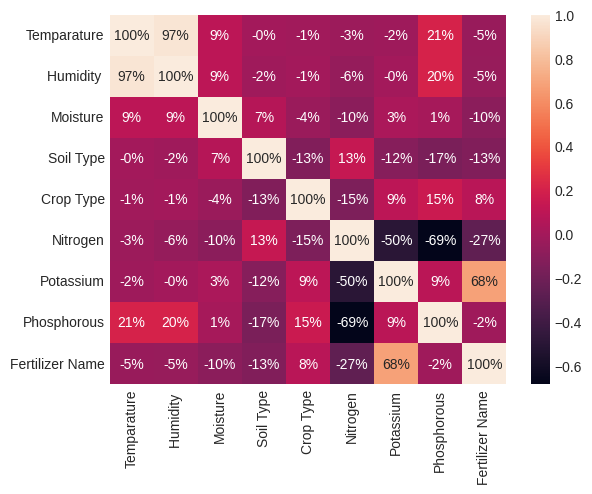

In [46]:
#Visualize the correlation of above data using heatmap
sns.heatmap(data1,annot=True,fmt='.0%')

# **Machine Learning**

In [81]:
#Dividing data into X and Y(converting into numpy)
X=df.iloc[:,0:8].values
Y=df.iloc[:,8].values

In [82]:
print(Y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0.]


In [83]:
#Splitting dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [84]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define a list of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, Y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(Y_test, y_pred)

    # Print the accuracy and other metrics if needed
    print(f"{name} Accuracy: {accuracy}")


Logistic Regression Accuracy: 0.9
Decision Tree Accuracy: 0.95
Random Forest Accuracy: 0.9
SVM Accuracy: 0.85


Best Model: Decision Tree

In [87]:
import joblib
# Save the Decision Tree model
model_filename = "decision_tree_model.pkl"
joblib.dump(clf, model_filename)

['decision_tree_model.pkl']

In [96]:

import pandas as pd
import joblib

# Load the Decision Tree model
model = joblib.load('decision_tree_model.pkl')

# Function to preprocess input data
def preprocess_input(input_data):
    # Your preprocessing steps here (e.g., scaling)
    return input_data

# Function to make predictions
def predict(input_data):
    preprocessed_data = preprocess_input(input_data)
    predictions = model.predict(preprocessed_data)
    return predictions

# Prompt the user for input
temperature = float(input("Enter Temperature: "))
humidity = float(input("Enter Humidity: "))
moisture = float(input("Enter Moisture: "))
soil_type = input("Enter Soil Type: ")
crop_type = input("Enter Crop Type: ")
nitrogen = float(input("Enter Nitrogen: "))
potassium = float(input("Enter Potassium: "))
phosphorous = float(input("Enter Phosphorous: "))

# Create a DataFrame from user input
input_data = pd.DataFrame({
    'Temperature': [temperature],
    'Humidity': [humidity],
    'Moisture': [moisture],
    'Soil Type': [soil_type],
    'Crop Type': [crop_type],
    'Nitrogen': [nitrogen],
    'Potassium': [potassium],
    'Phosphorous': [phosphorous]
})

# Make predictions
output = predict(input_data)
print("Predicted Fertilizer Name:", output)

Enter Temperature: 20
Enter Humidity: 30
Enter Moisture: 40
Enter Soil Type: 0
Enter Crop Type: 1
Enter Nitrogen: 20
Enter Potassium: 0
Enter Phosphorous: 20
Predicted Fertilizer Name: [0.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
